In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
diab = pd.read_csv('/content/drive/MyDrive/Data Sets/diabetes.csv')

In [ ]:
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#Identify the features and target variable
#Create X - features, y containing target
features_cols=['Pregnancies',	'Glucose',	'BloodPressure',	'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction',	'Age']
X=diab[features_cols]
y=diab.Outcome

In [ ]:
X.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
y.head()


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [ ]:
#Splitting the data into Training and Testing datasets using Train,Test,Split method

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=100)


In [ ]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
579,2,197,70,99,0,34.7,0.575,62
46,1,146,56,0,0,29.7,0.564,29
508,2,84,50,23,76,30.4,0.968,21
384,1,125,70,24,110,24.3,0.221,25
163,2,100,64,23,0,29.7,0.368,21
...,...,...,...,...,...,...,...,...
578,10,133,68,0,0,27.0,0.245,36
53,8,176,90,34,300,33.7,0.467,58
350,4,92,80,0,0,42.2,0.237,29
79,2,112,66,22,0,25.0,0.307,24


In [ ]:
#Build a decision tree
#Calculate Root node
#Measures
from sklearn.tree import DecisionTreeClassifier

#Create Object of classifier
dtc=DecisionTreeClassifier(criterion='entropy')

#Train and Build the model
dtc.fit(X_train,y_train)

#Test the model
y_predict=dtc.predict(X_test)


In [ ]:
from sklearn import metrics
print('Accuracy is', metrics.accuracy_score(y_test,y_predict))


Accuracy is 0.6510416666666666


[Text(0.5335365853658537, 0.9722222222222222, 'x[1] <= 123.5\nentropy = 0.936\nsamples = 576\nvalue = [373, 203]'),
 Text(0.203125, 0.9166666666666666, 'x[5] <= 26.95\nentropy = 0.641\nsamples = 332\nvalue = [278, 54]'),
 Text(0.19092987804878048, 0.8611111111111112, 'entropy = 0.0\nsamples = 104\nvalue = [104, 0]'),
 Text(0.21532012195121952, 0.8611111111111112, 'x[7] <= 28.5\nentropy = 0.79\nsamples = 228\nvalue = [174, 54]'),
 Text(0.08536585365853659, 0.8055555555555556, 'x[4] <= 91.0\nentropy = 0.406\nsamples = 111\nvalue = [102, 9]'),
 Text(0.07317073170731707, 0.75, 'x[1] <= 111.5\nentropy = 0.539\nsamples = 73\nvalue = [64, 9]'),
 Text(0.036585365853658534, 0.6944444444444444, 'x[7] <= 24.5\nentropy = 0.367\nsamples = 57\nvalue = [53, 4]'),
 Text(0.024390243902439025, 0.6388888888888888, 'entropy = 0.0\nsamples = 37\nvalue = [37, 0]'),
 Text(0.04878048780487805, 0.6388888888888888, 'x[4] <= 84.5\nentropy = 0.722\nsamples = 20\nvalue = [16, 4]'),
 Text(0.036585365853658534, 0.58

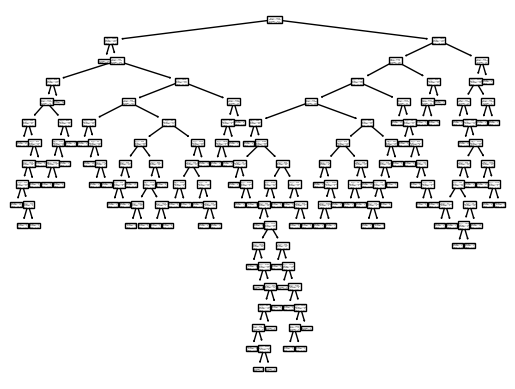

In [ ]:
from sklearn import tree
tree.plot_tree(dtc)

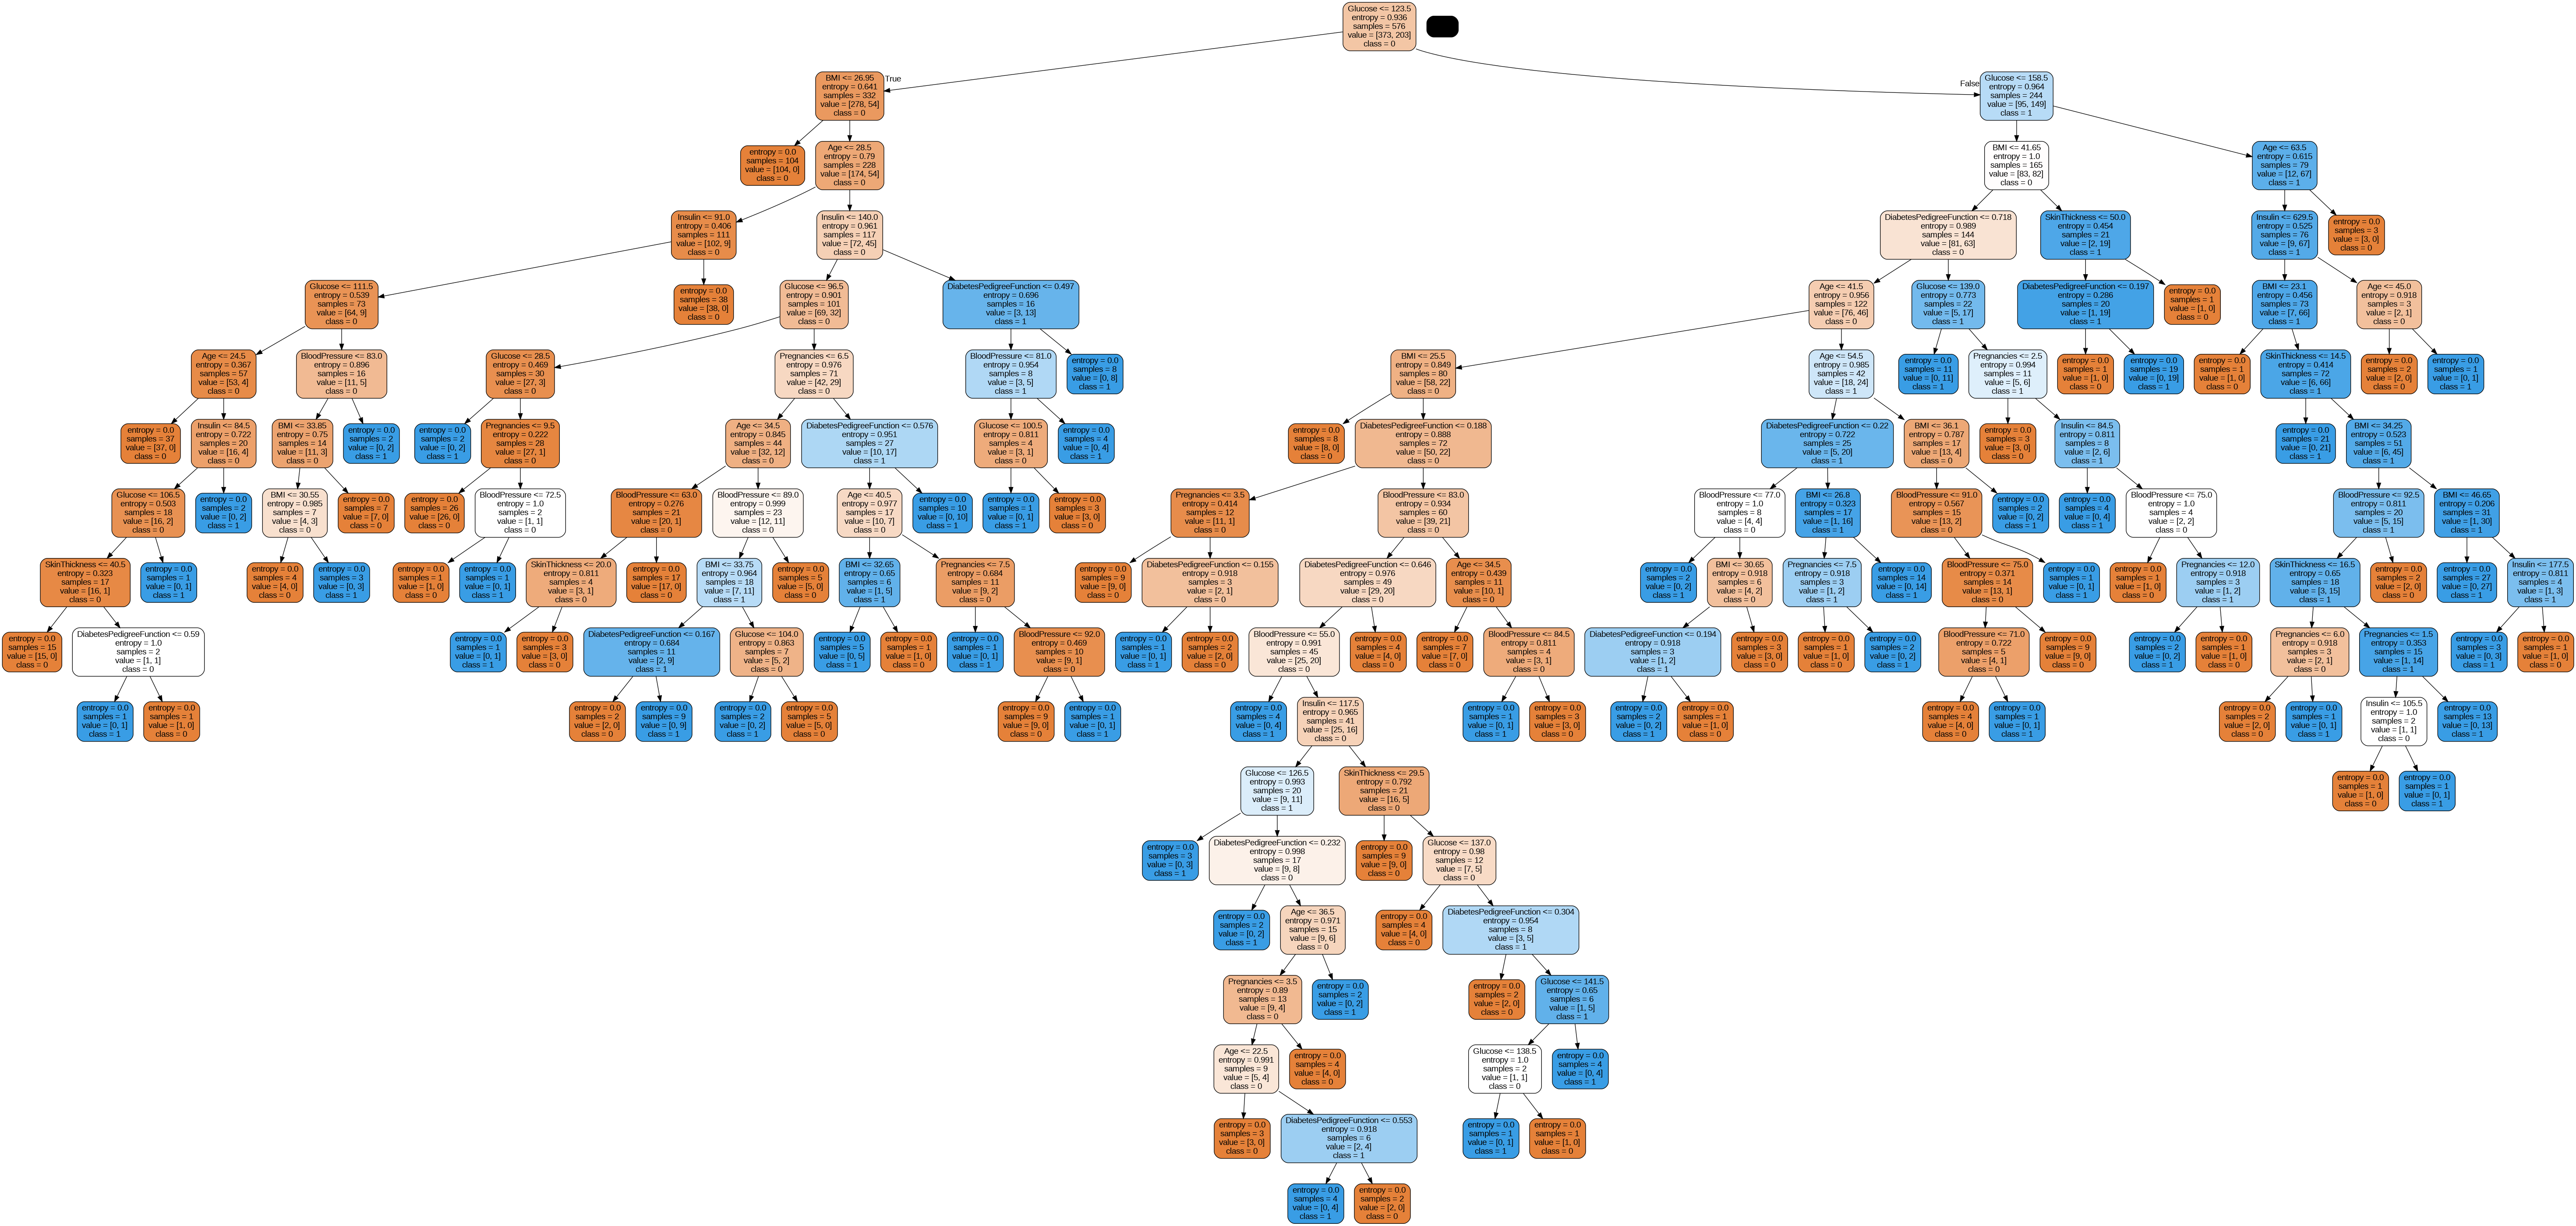

In [ ]:
#Creating a Tree
from sklearn.tree import export_graphviz

#Creating an Output file
from io import StringIO

#Writing Data
import pydotplus

from IPython.display import Image

#Create an empty file
out_data=StringIO()

#Create a Tree
export_graphviz(dtc,out_file=out_data,feature_names=features_cols,class_names=['0','1'],rounded='True',filled='True')

#Convert to Pic
graph=pydotplus.graph_from_dot_data(out_data.getvalue())

#Write it to a file
graph.write_png("d1.png")

#display the Image
Image(graph.create_png())